In [6]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) '''

df=pd.read_csv('data/iris.csv')
df.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
X=df.drop(['Species'],axis=1)
y=df['Species']
print(X)
print(y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgin

In [43]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

sc=StandardScaler()
le=LabelEncoder()
X=sc.fit_transform(X)
y=le.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Accuracy:1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



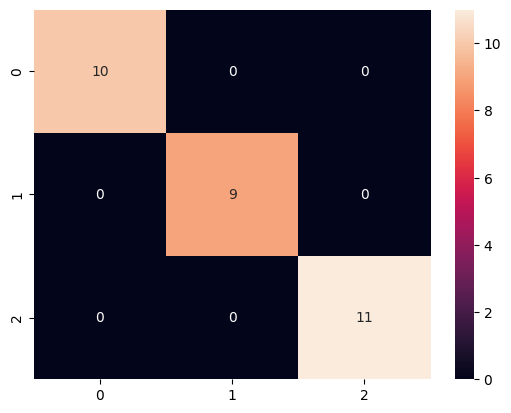

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay


lda=LinearDiscriminantAnalysis(n_components=2)
X_train_lda=lda.fit_transform(X_train,y_train)
pred=lda.predict(X_test)

acc=accuracy_score(y_test,pred)
print(f'Accuracy:{acc}')

conf_matrix=confusion_matrix(y_test,pred)
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True)

print(classification_report(y_test,pred))

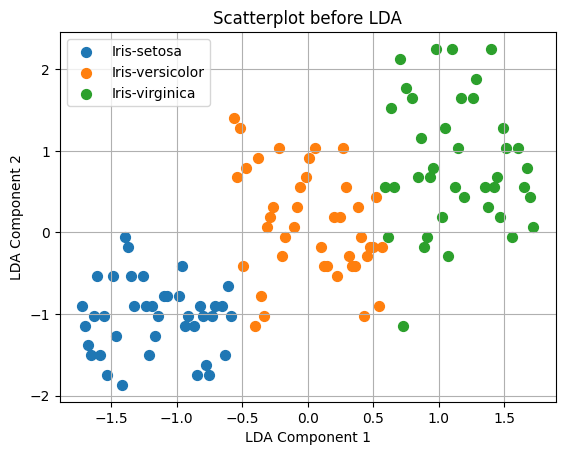

In [47]:
for i, label in enumerate(encoded_labels):
    plt.scatter(X_train[y_train == label, 0], X_train[y_train == label, 1], s=50, label=original_labels[i])

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title('Scatterplot before LDA')
plt.legend()
plt.grid(True)
plt.show()

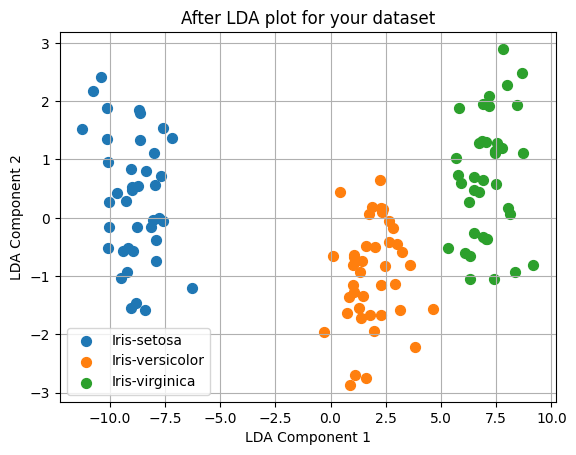

In [50]:
original_labels = df['Species'].unique() #Use original species column for labels
encoded_labels = le.transform(original_labels)  # Get encoded versions of original labels for comparison
# Iterate over encoded labels and plot:
for i, label in enumerate(encoded_labels):
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], s=50, label=original_labels[i])

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title('After LDA plot for your dataset')
plt.legend()
plt.grid(True)
plt.show()

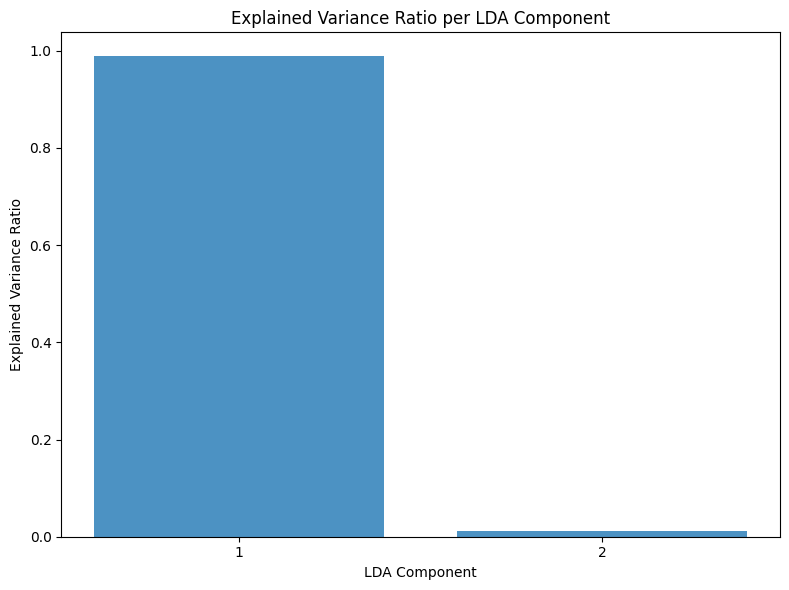

In [62]:
explained_variance_ratio = lda.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.xlabel('LDA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per LDA Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1)) #Ensure ticks are correct
plt.tight_layout()
plt.show()